In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

Requirement already up-to-date: sklearn in c:\users\jtile\anaconda3\lib\site-packages (0.0)


In [2]:
%matplotlib inline
import pandas as pd

In [3]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [22]:
from sklearn.model_selection import train_test_split
trainingData = train_test_split(newData.drop('ARR_DEL15',axis=1),newData['ARR_DEL15'],test_size=0.2,random_state=42)


# Load the Model from part 1

In [23]:
# Save model
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = '../models/trainingData.sav'


['../models/trainingData.sav']

In [24]:
# Load the Model from part 1
with open(filename, 'rb') as file:  
   trainingData = joblib.load(file)

trainingData

[        MONTH  DAY_OF_MONTH  DAY_OF_WEEK  CRS_DEP_TIME  ORIGIN_BOS  \
 485145      8             8            4            21           0   
 109338      5            14            4            17           0   
 30078       1            14            2             6           0   
 106314      4            21            2             6           0   
 126182      6            26            5             8           0   
 ...       ...           ...          ...           ...         ...   
 32485       2             8            6            16           0   
 290083      3            11            1            16           0   
 404470      6            19            3            11           1   
 3498        1             5            7             7           0   
 84359       3            31            2             7           0   
 
         ORIGIN_DCA  ORIGIN_DEN  ORIGIN_DFW  ORIGIN_EWR  ORIGIN_FLL  \
 485145           0           0           0           0           1   
 109

In [25]:
#from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = trainingData

In [26]:
print(train_x.shape)
print(test_x.shape)

(79281, 14)
(19821, 14)


In [27]:
print(train_y.shape)
print(test_y.shape)

(79281,)
(19821,)


In [28]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [29]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8040966651531204

In [30]:
test_x.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ORIGIN_BOS,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_EWR,ORIGIN_FLL,ORIGIN_LGA,ORIGIN_MCO,ORIGIN_MIA,ORIGIN_ORD
384820,5,21,2,13,0,0,0,0,0,0,1,0,0,0
236526,12,22,7,17,0,0,0,0,0,0,0,1,0,0
407221,6,9,7,7,0,0,0,0,0,0,1,0,0,0
354301,5,11,6,8,0,0,0,0,0,0,0,1,0,0
183891,10,10,4,15,0,0,0,0,0,0,0,0,0,1


In [31]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [32]:
roc_auc_score(test_y, probabilities[:,1])

0.734469461635977

In [33]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[14557,  1327],
       [ 2556,  1381]], dtype=int64)

In [34]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.9280196107562027

In [35]:
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.7926527504599962

# Visualize Output of Model

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

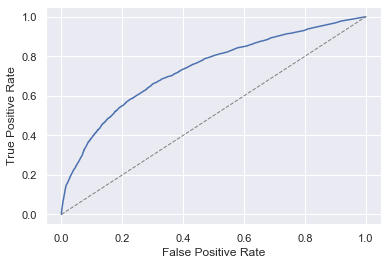

In [37]:
from sklearn.metrics import roc_curve

fpr, tpr, _= roc_curve(test_y, probabilities[:,1])
plt.plot(fpr ,tpr)
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [38]:
test_x.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ORIGIN_BOS',
       'ORIGIN_DCA', 'ORIGIN_DEN', 'ORIGIN_DFW', 'ORIGIN_EWR', 'ORIGIN_FLL',
       'ORIGIN_LGA', 'ORIGIN_MCO', 'ORIGIN_MIA', 'ORIGIN_ORD'],
      dtype='object')

In [40]:
def predict_delay(departure_date_time, origin):
    from datetime import datetime
    
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
    day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    orign = origin.upper()
#    destination = destination.upper()
    
    input = [{'MONTH':month,
              'DAY_OF_MONTH': day,
              'DayOfWeek': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_BOS': 1 if origin == 'BOS' else 0,
              'ORIGIN_DCA': 1 if origin == 'DCA' else 0,
              'ORIGIN_DEN': 1 if origin == 'DEN' else 0,
              'ORIGIN_DFW': 1 if origin == 'DFW' else 0,
              'ORIGIN_EWR': 1 if origin == 'EWR' else 0,
              'ORIGIN_FLL': 1 if origin == 'FLL' else 0,
              'ORIGIN_LGA': 1 if origin == 'LGA' else 0,
              'ORIGIN_MCO': 1 if origin == 'MCO' else 0,
              'ORIGIN_MIA': 1 if origin == 'MIA' else 0,
              'ORIGIN_ORD': 1 if origin == 'ORD' else 0
             
        
    }]
    
    return model.predict_proba(pd.DataFrame(input))[0][0]
    
    
                                                       

In [41]:
# Date input to the predict_delay function use the internation date format dd/mm/year.
predict_delay('24/10/2020 15:00:00','BOS')

0.62

(0.0, 1.0)

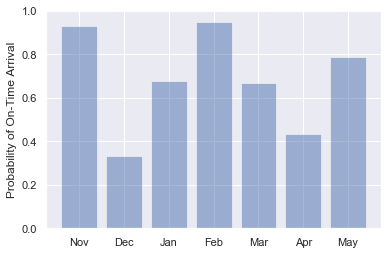

In [42]:
import numpy as np
labels = ('Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May')
values = (predict_delay('01/11/2020 15:00:00','BOS'),
          predict_delay('01/12/2020 15:00:00','BOS'),
          predict_delay('01/01/2021 15:00:00','BOS'),
          predict_delay('01/02/2021 15:00:00','BOS'),
          predict_delay('01/03/2021 15:00:00','BOS'),
          predict_delay('01/04/2021 15:00:00','BOS'),
          predict_delay('01/05/2021 15:00:00','BOS'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels,labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

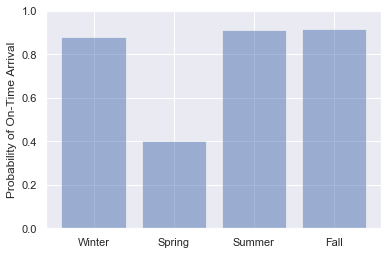

In [43]:
import numpy as np
labels = ('Winter', 'Spring', 'Summer', 'Fall')
values = (predict_delay('21/12/2020 15:00:00','BOS'),
          predict_delay('21/03/2021 15:00:00','BOS'),
          predict_delay('21/06/2021 15:00:00','BOS'),
          predict_delay('21/09/2021 15:00:00','BOS'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels,labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))